# Problem Description
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Step 1: Importing and Merging Data

In [1]:
#Importing libraries

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing Pandas and NumPy
import pandas as pd, numpy as np
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
# visulaisation
from matplotlib.pyplot import xticks

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics


import statsmodels.api as sm

%matplotlib inline

In [2]:
# Importing all datasets
ld = pd.read_csv('Leads.csv')
ld.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Inspecting the Dataframe

In [3]:
ld.shape

(9240, 37)

In [4]:
ld.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Step 3: Data Preprocessing/ Cleaning

#### 3 a) Replacing level 'Select' with Nan

In [6]:
# Categorical Columns having level'Select'
ld.columns[ld.isin(['Select']).any()]

Index(['Specialization', 'How did you hear about X Education', 'Lead Profile',
       'City'],
      dtype='object')

In [7]:
# 'Specialization' column value count
ld['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [8]:
# Impute 'Select' value by nan in 'Specialization' column

ld['Specialization'] = ld['Specialization'].replace('Select', np.nan)

In [9]:
# Value count for 'How did you hear about X Education','Lead Profile' & 'City'

ld['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [10]:
ld['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [11]:
ld['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [12]:
# Impute 'Select' value by nan for columns for 'How did you hear about X Education','Lead Profile' & 'City'

ld['How did you hear about X Education'] = ld['How did you hear about X Education'].replace('Select', np.nan)
ld['Lead Profile'] = ld['Lead Profile'].replace('Select', np.nan)
ld['City'] = ld['City'].replace('Select', np.nan)

#### 3 b) Dealing with missing values

In [13]:
#calculate the percentage of missing values
(ld.isnull().sum()/len(ld)*100).sort_values(ascending = False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

#### Removing columns with missing values more than 40%

As per Industrial Standards, Threshold limit of the missing values can be between 40% to 50 % depending upon the data acquired for a specific sector.

In [14]:
#Drop columns which have atleast 40% null value (in other words, taking threshold of missing values as 40%) 
ld = ld.dropna(thresh=len(ld)*0.6, axis='columns')

In [15]:
ld.shape

(9240, 30)

In [16]:
#calculate the percentage of missing values again and viewing top30 columns
(ld.isnull().sum()/len(ld)*100).sort_values(ascending = False).head(30)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

#### 3 c) Dropping irrelevant columns

In [17]:
# Drop columns with single values

cols = []
for i in ld.columns:
    if ld[i].nunique() == 1:
        cols.append(i)
ld.drop(cols, axis =1,inplace = True)
ld.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,Interested in other courses,NaN,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,Ringing,NaN,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


In [18]:
# Drop Prospect ID as these are unique ID's created for all leads. We will keep Lead Number for identification of the same.

ld = ld.drop(['Prospect ID'], axis=1)
ld.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,No,No,No,No,Interested in other courses,NaN,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,No,No,No,No,Ringing,NaN,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


In [19]:
# Check the  column "country"
ld['Country'].value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [20]:
# Check the percentage of "India" in the column "country" 

India_per = round(100*len(ld[ld['Country'] == 'India'])/len(ld['Country']),2)
print(India_per)

70.26


In [21]:
# Since "India" occurs around 70% of times in the "Country" column, 
# Around 25% values are "Nan" (which would ulimately be replaced with "India" considering mode for missing values)
# Since 95% values will be "India", hence we will drop this column

ld = ld.drop(['Country'], axis=1)
ld.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,No,No,No,No,Interested in other courses,NaN,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,No,No,No,No,Ringing,NaN,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


In [22]:
# Check the  column "country"
ld['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [23]:
# Check the percentage of "Better Career Prospects" in the column "What matters most to you in choosing a course" 

BCP_per = round(100*len(ld[ld['What matters most to you in choosing a course'] == 'Better Career Prospects'])/len(ld['What matters most to you in choosing a course']),2)
print(BCP_per)

70.65


In [24]:
# Better Career Prospects occurs around 99.99% of times in the column "What matters most to you in choosing a course" 
# we shall go ahead and drop the column

ld = ld.drop(['What matters most to you in choosing a course'], axis=1)

#### 3 d) Imputing Null Values & Consolidating categories in columns with insignificant counts

In [25]:
#Recheck percentage of missing values
round((ld.isnull().sum()/len(ld.index) *100),2).sort_values(ascending = False)

City                                      39.71
Specialization                            36.58
Tags                                      36.29
What is your current occupation           29.11
TotalVisits                                1.48
Page Views Per Visit                       1.48
Last Activity                              1.11
Lead Source                                0.39
X Education Forums                         0.00
A free copy of Mastering The Interview     0.00
Through Recommendations                    0.00
Digital Advertisement                      0.00
Newspaper                                  0.00
Lead Number                                0.00
Newspaper Article                          0.00
Search                                     0.00
Lead Origin                                0.00
Total Time Spent on Website                0.00
Converted                                  0.00
Do Not Call                                0.00
Do Not Email                            

In [26]:
#Check value counts of column "City" 
ld['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [27]:
# Replacing missing/null values with mode value

ld['City'].fillna(ld.City.mode()[0],inplace = True)

In [28]:
#Check value counts of column "What is your current occupation" 

ld['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [29]:
# Replacing missing/null values with mode value

ld['What is your current occupation'].fillna(ld['What is your current occupation'].mode()[0],inplace = True)

In [30]:
#Check value counts of column "Specialization" 

ld['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [31]:
# Clubbing the similar specializations like "Management" and "E-Business"

mgmt = ['Finance Management','Human Resource Management','Marketing Management','Operations Management','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management']
ld['Specialization'] = ld['Specialization'].replace(mgmt,'Management')

ld['Specialization'] = ld['Specialization'].replace('E-COMMERCE','E-Business')

In [32]:
# Replacing missing/null values with "Others" since taking mode value doesn't seem right here

ld['Specialization'] = ld['Specialization'].replace(np.nan,'Others')

In [33]:
# Check value counts for column "Tags"

ld['Tags'].value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [34]:
# Club all the Similar tags in one category

ld['Tags'] = ld['Tags'].replace(['invalid number','wrong number given','number not provided'],'NA phone number')
ld['Tags'] = ld['Tags'].replace(['Lost to EINS','Lost to Others'],'Lost')
ld['Tags'] = ld['Tags'].replace(['Ringing','switched off','Busy','opp hangup'],'Follow up - Call')
ld['Tags'] = ld['Tags'].replace(['Not doing further education','Diploma holder (Not Eligible)'],'Not Interested/Not Eligible')

In [35]:
# Check the the value counts again for Tags
ld['Tags'].value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Follow up - Call                                     1662
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
Not Interested/Not Eligible                           208
Lost                                                  182
NA phone number                                       157
Interested  in full time MBA                          117
Graduation in progress                                111
in touch with EINS                                     12
Still Thinking                                          6
Want to take admission but has financial problems       6
In confusion whether part time or DLP                   5
Interested in Next batch                                5
Lateral student                                         3
Shall take in 

In [36]:
# Replacing missing/null values with mode value and tags with insignificant value count as "Others"


ld['Tags'].fillna(ld['Tags'].mode()[0],inplace = True)
insig = ['in touch with EINS','Still Thinking','Want to take admission but has financial problems','In confusion whether part time or DLP','Interested in Next batch','Lateral student','Shall take in the next coming month','University not recognized','Recognition issue (DEC approval)']
ld['Tags'] = ld['Tags'].replace(insig,'Others')

In [37]:
# Check the the value counts again for Tags
ld['Tags'].value_counts(dropna = False)

Will revert after reading the email    5425
Follow up - Call                       1662
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Not Interested/Not Eligible             208
Lost                                    182
NA phone number                         157
Interested  in full time MBA            117
Graduation in progress                  111
Others                                   42
Name: Tags, dtype: int64

In [38]:
ld['Last Activity'].value_counts(dropna = False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [39]:
# Replacing missing/null values and insignificant value count as "Others"

insignificant =[np.NaN,'Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Marked Spam','Email Received','Resubscribed to emails','Visited Booth in Tradeshow','Unreachable','Unsubscribed']
ld['Last Activity'] = ld['Last Activity'].replace(insignificant,'Others')

In [40]:
ld['Last Activity'].value_counts(dropna = False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [41]:
# Check the value counts for the column "TotalVisits"

ld['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [42]:
# Impute the null values in "TotalVisits" by the median

ld['TotalVisits'] = ld['TotalVisits'].replace(np.nan, ld['TotalVisits'].median())

In [43]:
# Check the value counts for the column "Page Views Per Visit"

ld['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [44]:
# Impute the null values in "Page Views Per Visit" by the median

ld['Page Views Per Visit'] = ld['Page Views Per Visit'].replace(np.nan, ld['Page Views Per Visit'].median())

In [45]:
# Check the value counts for the column "Lead Source"

ld['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [46]:
# Since "Google" appears twice with different cases. Hence we shall convert all rows with value "google" to "Google" .
# Also since "Google" has the major chunk of data, we can impute the null values with "Google"

ld['Lead Source'] = ld['Lead Source'].replace('google', 'Google')
ld['Lead Source'] = ld['Lead Source'].replace(np.nan, 'Google')

In [47]:
#Check value counts of column "Last Notable Activity"
ld['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [48]:
# consolidating categories with insiginificant count in column "Last Notable Activity"

lc = ['Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','Form Submitted on Website',
'Resubscribed to emails','Approached upfront','Email Received','View in browser link Clicked']
ld['Last Notable Activity'] = ld['Last Notable Activity'].replace(lc,'Other')

In [49]:
#Final check on percentage of missing values
round((ld.isnull().sum()/len(ld.index) *100),2).sort_values(ascending = False)

Lead Number                               0.0
Lead Origin                               0.0
A free copy of Mastering The Interview    0.0
City                                      0.0
Tags                                      0.0
Through Recommendations                   0.0
Digital Advertisement                     0.0
Newspaper                                 0.0
X Education Forums                        0.0
Newspaper Article                         0.0
Search                                    0.0
What is your current occupation           0.0
Specialization                            0.0
Last Activity                             0.0
Page Views Per Visit                      0.0
Total Time Spent on Website               0.0
TotalVisits                               0.0
Converted                                 0.0
Do Not Call                               0.0
Do Not Email                              0.0
Lead Source                               0.0
Last Notable Activity             

In [50]:
ld.shape

(9240, 22)

### Step 4: Data Visualization & Outlier Treatment

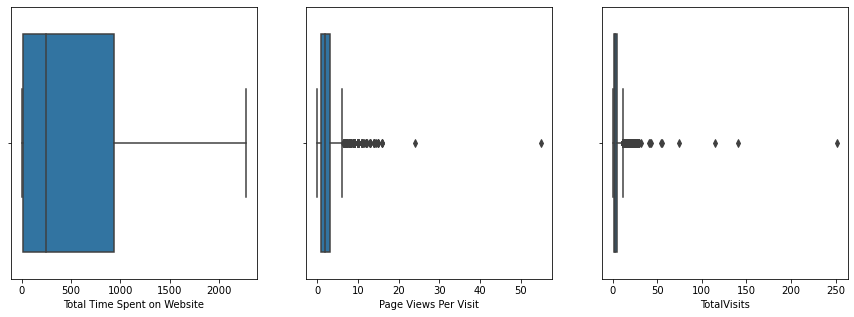

In [51]:
# Check the outliers in all the numeric columns
num_col = ['Total Time Spent on Website', 'Page Views Per Visit','TotalVisits']

plt.figure(figsize = (15, 5))
for i, col in enumerate(num_col):
    plt.subplot(1,3, i+1)
    sns.boxplot(ld[col])
plt.show()

#### Clearly the data is skewed for "Page Views per visit" & "Total Visits"

In [52]:
# Checking outliers at 25%,50%,75%,90%,95%
ld.describe(percentiles=[.25,.5,.75,.90,.95])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [53]:
# Outlier treatment - Removing values beyond 95% for "Page Views per visit" & "Total Visits"
percentile = ld['TotalVisits'].quantile([0.95]).values
ld['TotalVisits'][ld['TotalVisits'] >= percentile[0]] = percentile[0]

percentile =ld['Page Views Per Visit'].quantile([0.95]).values
ld['Page Views Per Visit'][ld['Page Views Per Visit'] >= percentile[0]] = percentile[0]

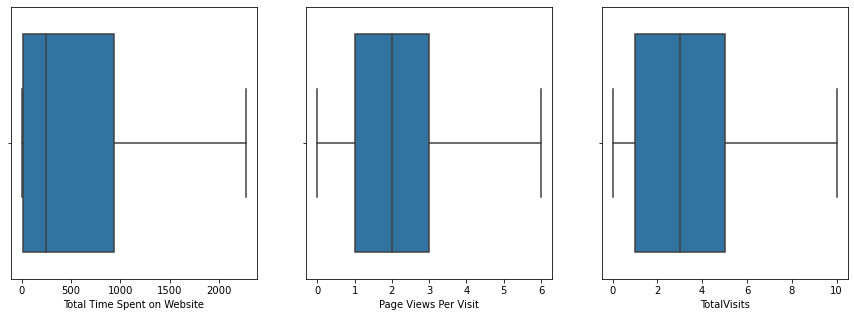

In [54]:
# Verify the outliers treatment in the numeric columns

plt.figure(figsize = (15, 5))
for i, col in enumerate(num_col):
    plt.subplot(1,3, i+1)
    sns.boxplot(ld[col])
plt.show()

##### Bivariate Analysis - Visualizing Numerical Columns with Target Column

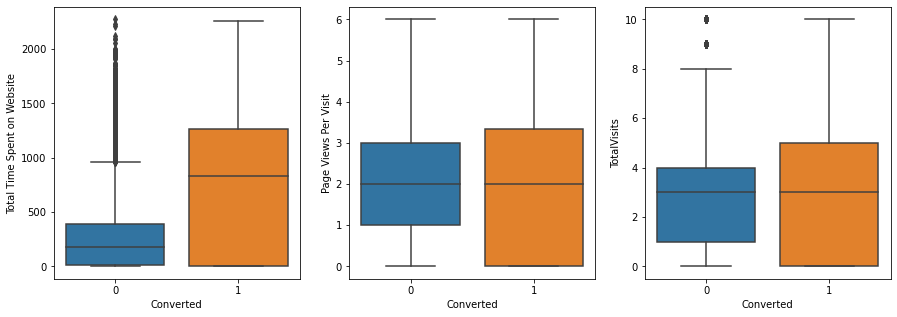

In [55]:
# Plotting numerical variables against target variable to analyse relations
plt.figure(figsize=(15, 5))
for var in num_col:
    plt.subplot(1,3,num_col.index(var)+1)
    sns.boxplot(y = var , x = 'Converted', data = ld)
plt.show()

Observations:
- 'TotalVisits' has same median values for both outputs of leads. No conclusion can be drawn from this.
-  More is the 'Total Time Spent on Website', more likely is the conversion. This is aligned with our general info too.
- 'Page Views Per Visit' also has same median values for both outputs of leads. Hence, inconclusive.

##### Bivariate Analysis - Visualizing Categorical Columns with Target Column

In [56]:
# Listing Categorical variables
cat_var = list(ld.columns[ld.dtypes == 'object'])
cat_var

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [57]:
# Function for viewing multiple plots    
def plot_cat_vars(lst):
    l = int(len(lst)/2)
    plt.figure(figsize=(20, l*7))
    for var in lst:
        plt.subplot(l,2,lst.index(var)+1)
        sns.countplot(x = var, hue = "Converted", data = ld)
        plt.xticks(rotation = 90)
    plt.show()   

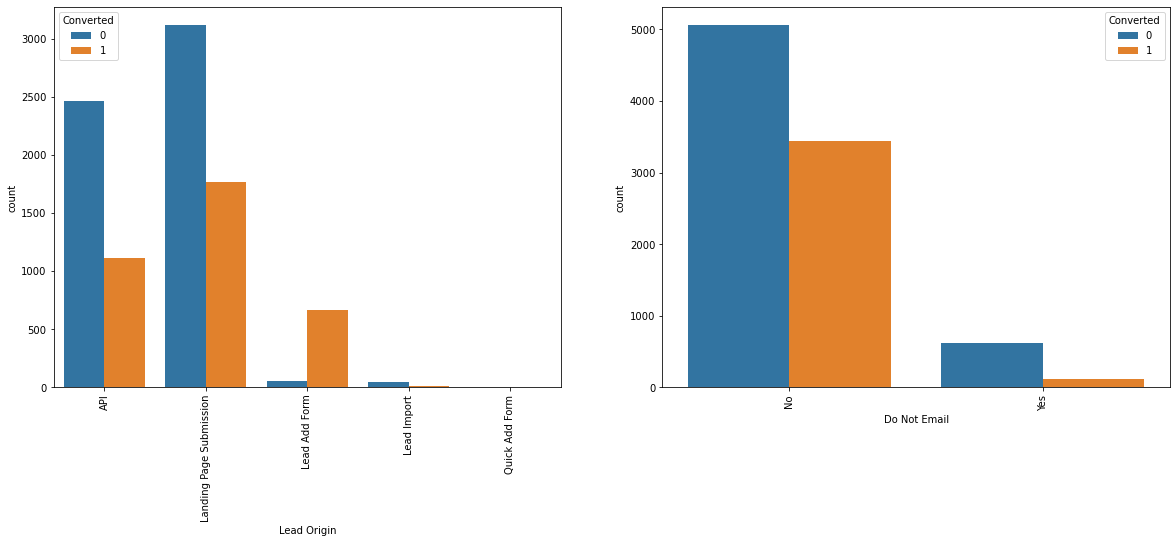

In [58]:
plot_cat_vars([cat_var[0],cat_var[2]])

Observations for **Lead Origin** : <br>
'API' and 'Landing Page Submission' generate the most leads but have less conversion rates of around 30%. Whereas, 'Lead Add Form' generates less leads but conversion rate is great. We should **try to increase conversion rate for 'API' and 'Landing Page Submission', and increase leads generation using 'Lead Add Form'**. 'Lead Import' does not seem very significant.

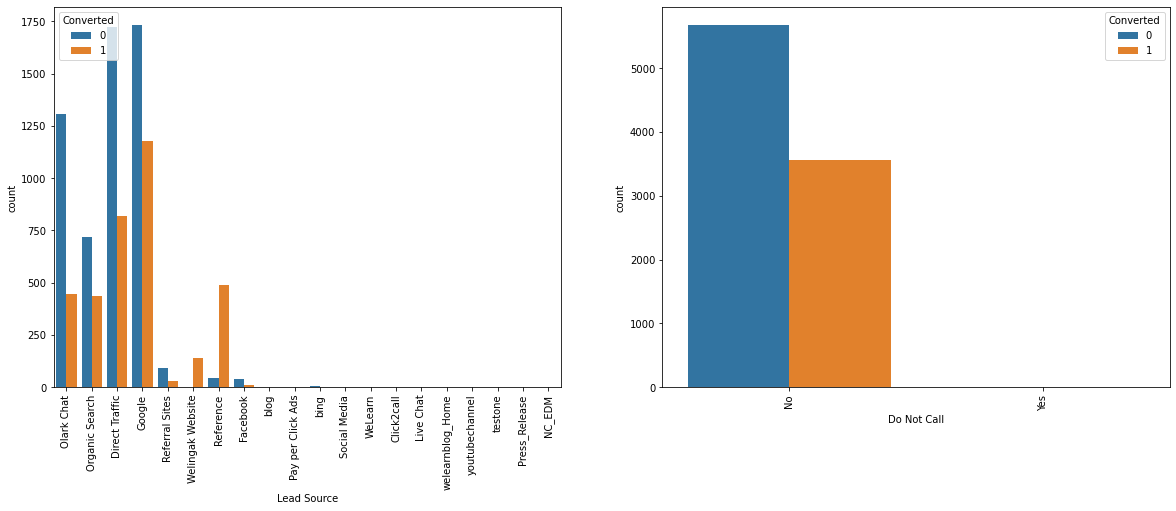

In [59]:
plot_cat_vars([cat_var[1],cat_var[3]])

Observations for **Lead Source** : <br>
- Spelling error: We've to change 'google' to 'Google'
- As it can be seen from the graph, number of leads generated by many of the sources are negligible. There are sufficient numbers till Facebook. We can convert all others in one single category of 'Others'.
- 'Direct Traffic' and 'Google' generate maximum number of leads while maximum conversion rate is achieved through 'Reference' and 'Welingak Website'.

Observations for **Do Not Email** and **Do Not Call** : <br>
As one can expect, most of the responses are 'No' for both the variables which generated most of the leads.

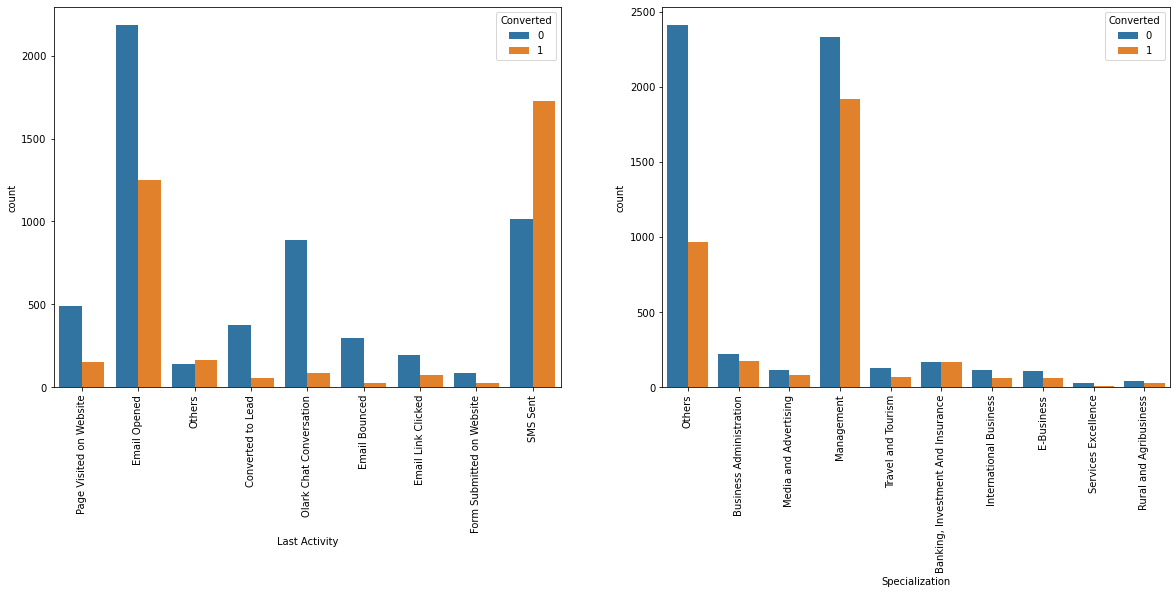

In [60]:
plot_cat_vars([cat_var[4],cat_var[5]])

Observations for **Last Activity** : <br>
- Highest number of lead are generated where the last activity is 'Email Opened' while maximum conversion rate is for the activity of 'SMS Sent'. Its conversion rate is significantly high.

Observations for **Specialization** : <br>
Conversion rates are mostly for 'Management' specializations

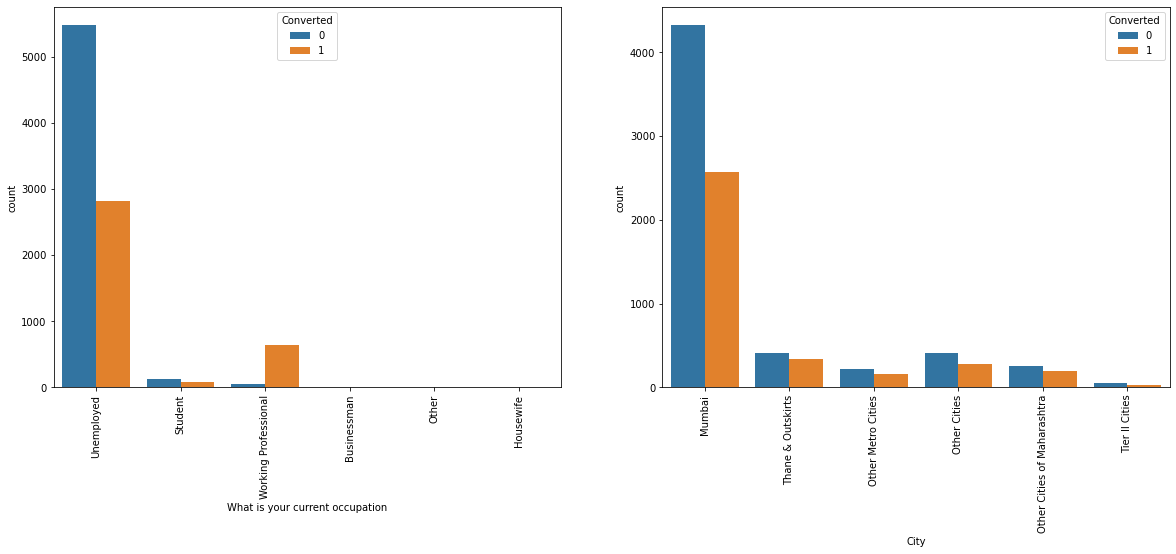

In [61]:
plot_cat_vars([cat_var[6],cat_var[14]])

Observations for **What is your current occupation** and  **City**: <br>
- The highest conversion rate is for 'Working Professional'. High number of leads are generated for 'Unemployed' but conversion rate is low.
- Mumbai has the highest leads but nearly 60% conversion rate. Rest have lower leads but higher conversion rates.

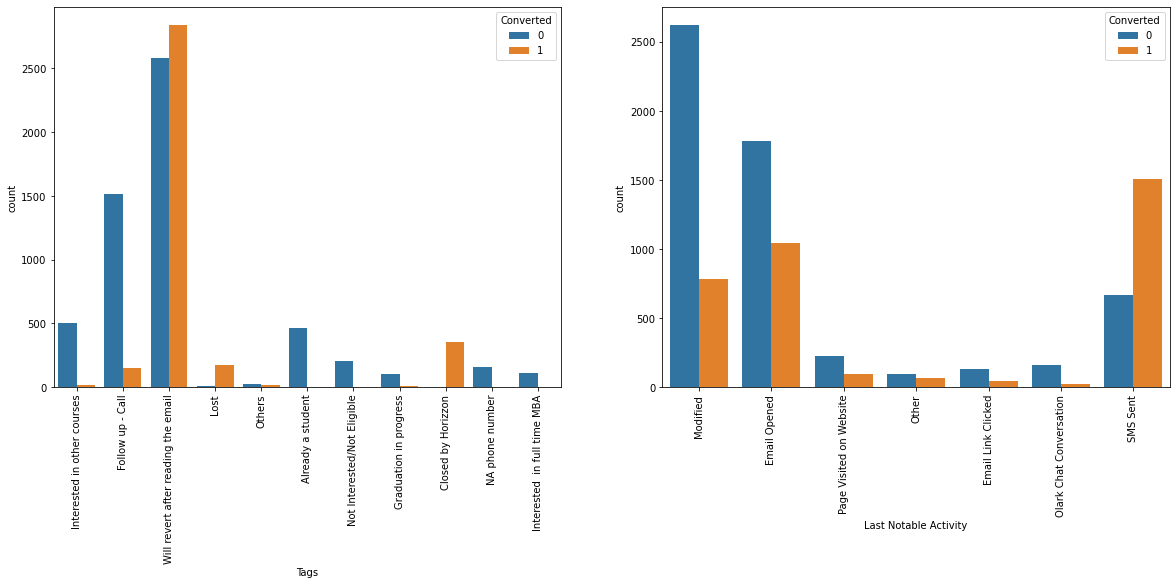

In [62]:
plot_cat_vars([cat_var[13],cat_var[16]])

Observations for **Tags** and **Last Notable Activity** : <br>
- 'Last Notable Activity' has most  leads for the category 'Modified' while most conversion rate for 'SMS Sent' activity.
- Most leads generated and the highest conversion rate are both attributed to the tag 'Will revert after reading the email'.

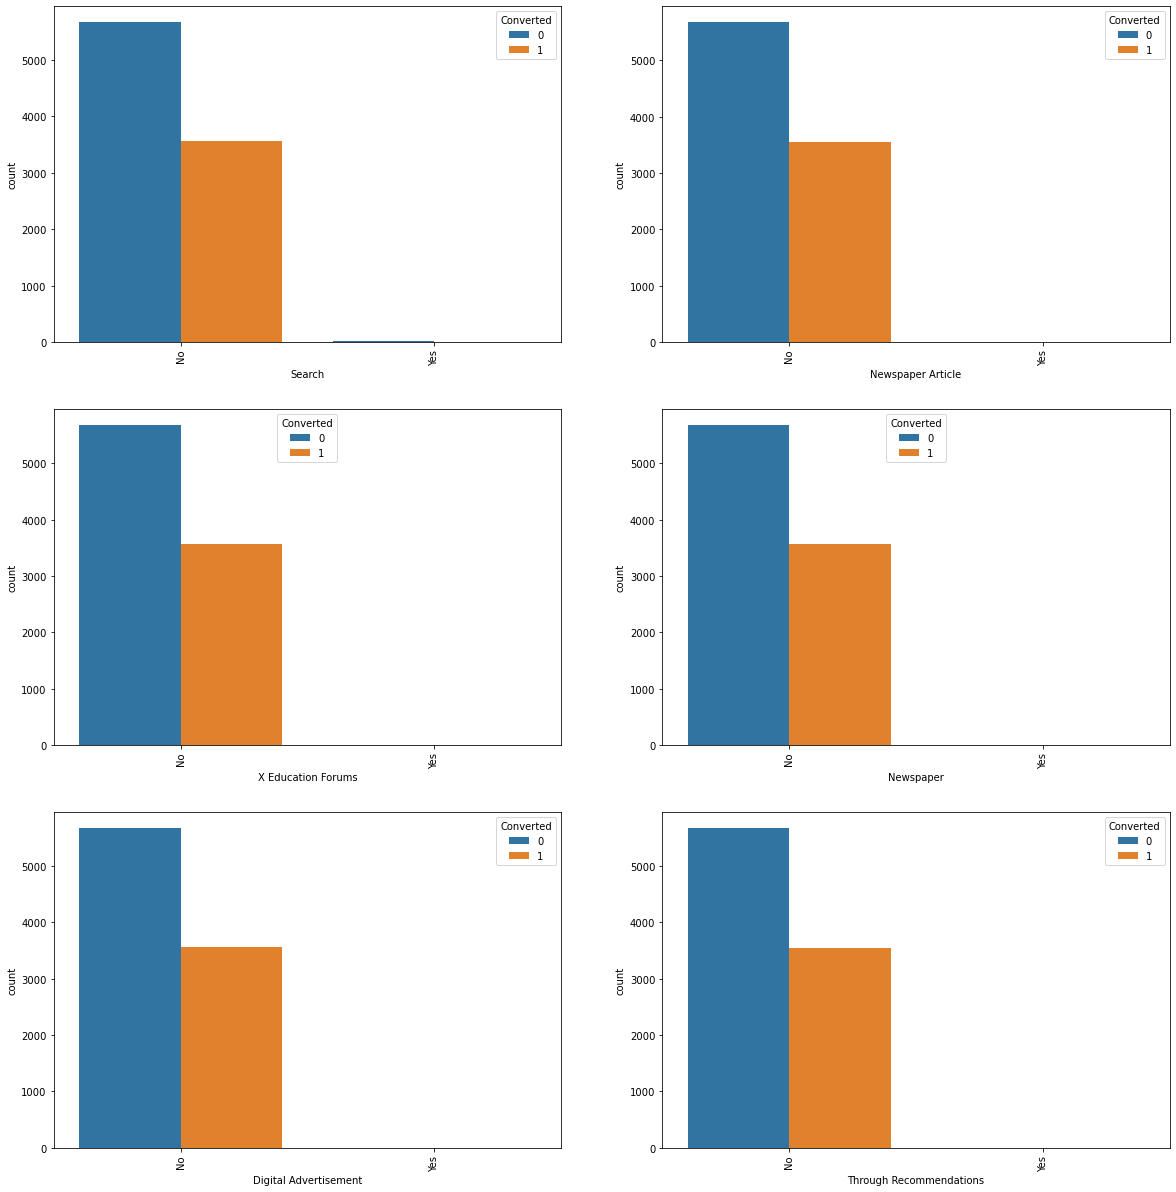

In [63]:
plot_cat_vars(cat_var[7:13])

Observations for **Search**,  **Newspaper Article**, **X Education Forums**, **Newspaper**, **Digital Advertisement**, **Through Recommendations**: <br>
As all the above variables have most of the values as no, nothing significant can be inferred from these plots.

Based on the data visualization, we can drop the variables which are not significant for analysis and will not any information to the model.

In [64]:
ld = ld.drop(['Do Not Call','Do Not Email','Search','Newspaper Article','X Education Forums','Newspaper',
              'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview'],1)

In [65]:
# Final dataframe
ld.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Others,Unemployed,Follow up - Call,Mumbai,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Follow up - Call,Mumbai,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,Modified


### Step 5: Data Preparation

#### Dummy Variable creation
For categorical variables with multiple levels, we create dummy features (one-hot encoded).

In [66]:
# Categorical variables
cat_var = list(ld.columns[ld.dtypes == 'object'])
cat_var

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'City',
 'Last Notable Activity']

In [67]:
# To create dummy variables and drop first ones
dummy = pd.get_dummies(ld[cat_var], drop_first=True)

# To add result to the original dataframe
ld = pd.concat([ld, dummy], axis=1)

# To drop the original variables
ld = ld.drop(cat_var,1)

In [68]:
ld.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,660719,0,1.0,305,1.0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,660681,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


#### Train Test Split

In [69]:
# Importing required package
from sklearn.model_selection import train_test_split

In [70]:
# To put feature variable to X
X = ld.drop(['Converted', 'Lead Number'],axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [71]:
# To put response variable to y
y = ld['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [72]:
# To split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [73]:
#lets check the shape
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (6468, 69)
y_train Size (6468,)


#### Feature Scaling

In [74]:
# Rescaling the features with Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [75]:
# Numerical variables
num_var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
#Applying scaler to all numerical columns
X_train[num_var] = scaler.fit_transform(X_train[num_var])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
1871,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6795,0.299722,0.005716,-0.516439,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3516,0.662077,-0.691418,0.143543,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8105,0.662077,1.365219,1.553761,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3934,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Step 6: Model Building

After the creation of dummy variables, we have a large number of features. It is better to use RFE first for feature elimination.

In [76]:
import statsmodels.api as sm

In [77]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6399
Model Family:                Binomial   Df Model:                           68
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 11 Apr 2022   Deviance:                       88788.
Time:                        23:21:56   Pearson chi2:                 4.34e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -3.388e+15   5.11e+07  -6.63e+07      0.000   -3.39e+15   -3.39e+15
TotalVisits                                           7.759e+13   1.41e+06   5.49e+07      0.000    7.76e+13    7.76e+13
Total Time Spent on Website                           4.435e+14   9.85e+05    4.5e+08      0.000    4.44e+14    4.44e+14
Page Views Per Visit                                 -1.214e+14   1.55e+06  -7.84e+07      0.000   -1.21e+14   -1.21e+14
Lead Origin_Landing Page Submission                  -5.134e+14   3.38e+06  -1.52e+08      0.000   -5.13e+14   -5.13e+14
Lead Origin_Lead Add Form                              6.19e+14    1.3e+07   4.76e+07      0.000    6.19e+14    6.19e+14
Lead Origin_Lead Import                               3.546e+14   4.82e+07   7.36e+06      0.000    3.55e+14    3.55e+14
Lead Origin_Quick Add Form                            3.222e+15   6.78e+07   4.75e+07      0.000    3.22e+15    3.22e+15
Lead Source_Direct Traffic                            8.441e+14   4.12e+07   2.05e+07      0.000    8.44e+14    8.44e+14
Lead Source_Facebook                                  5.941e+14   6.34e+07   9.37e+06      0.000    5.94e+14    5.94e+14
Lead Source_Google                                     9.75e+14   4.11e+07   2.37e+07      0.000    9.75e+14    9.75e+14
Lead Source_Live Chat                                 4.569e+15   6.15e+07   7.43e+07      0.000    4.57e+15    4.57e+15
Lead Source_NC_EDM                                    4.527e+15   7.88e+07   5.75e+07      0.000    4.53e+15    4.53e+15
Lead Source_Olark Chat                                1.137e+15   4.12e+07   2.76e+07      0.000    1.14e+15    1.14e+15
Lead Source_Organic Search                            9.253e+14   4.12e+07   2.25e+07      0.000    9.25e+14    9.25e+14
Lead Source_Pay per Click Ads                        -2.074e+15   7.88e+07  -2.63e+07      0.000   -2.07e+15   -2.07e+15
Lead Source_Press_Release                            -2.824e+15   6.31e+07  -4.48e+07      0.000   -2.82e+15   -2.82e+15
Lead Source_Reference                                 1.007e+15   3.92e+07   2.57e+07      0.000    1.01e+15    1.01e+15
Lead Source_Referral Sites                            8.447e+14   4.17e+07   2.02e+07      0.000    8.45e+14    8.45e+14
Lead Source_Social Media                              1.398e+15   6.29e+07   2.22e+07      0.000     1.4e+15     1.4e+15
Lead Source_WeLearn                                   4.452e+15   7.88e+07   5.65e+07      0.000    4.45e+15    4.45e+15
Lead Source_Welingak Website                          2.144e+15   3.97e+07   5.39e+07      0.000    2.14e+15    2.14e+15
Lead Source_bing                                      1.36

#### Feature Selection using RFE

In [78]:
# To create an instance of Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [79]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [80]:
# To check output of RFE
rfe.support_

array([False,  True, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True,  True,  True, False,  True, False, False,  True,
        True, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False,  True])

In [81]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 29),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 28),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 41),
 ('Lead Origin_Quick Add Form', False, 35),
 ('Lead Source_Direct Traffic', False, 24),
 ('Lead Source_Facebook', False, 30),
 ('Lead Source_Google', False, 33),
 ('Lead Source_Live Chat', False, 40),
 ('Lead Source_NC_EDM', False, 19),
 ('Lead Source_Olark Chat', False, 13),
 ('Lead Source_Organic Search', False, 32),
 ('Lead Source_Pay per Click Ads', False, 54),
 ('Lead Source_Press_Release', False, 20),
 ('Lead Source_Reference', False, 49),
 ('Lead Source_Referral Sites', False, 31),
 ('Lead Source_Social Media', False, 17),
 ('Lead Source_WeLearn', False, 25),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 52),
 ('Lead Source_blog', False, 16),
 ('Lead Source_testone', False, 55),
 ('Lead Source_welearnblog_Home', F

In [82]:
# Features selected
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Specialization_Others',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Tags_Closed by Horizzon', 'Tags_Graduation in progress', 'Tags_Lost',
       'Tags_NA phone number', 'Tags_Others',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [83]:
# Features eliminated
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization

#### Assessing the Model with StatsModels

In [84]:
import statsmodels.api as sm

# Function for building the model
def build_model(X,y):
    X_sm = sm.add_constant(X)    # To add a constant
    logm = sm.GLM(y, X_sm, family = sm.families.Binomial()).fit()    # To fit the model
    print(logm.summary())    # Summary of the model  
    return X_sm, logm

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate Variance Inflation Factor (VIF)
def check_VIF(X_in):
    X = X_in.drop('const',1)    # As we don't need constant
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values(by = "VIF", ascending = False)

##### Model 1
Running the first model by using the features selected by RFE

In [86]:
X1, logm1 = build_model(X_train[col],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1875.8
Date:                Mon, 11 Apr 2022   Deviance:                       3751.6
Time:                        23:22:05   Pearson chi2:                 1.11e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5273
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

All of the features have p-value < 0.05 i.e. they all seem significant.

We also have to check VIFs (Variance Inflation Factors) of features to see if there's any multicollinearity present.

In [87]:
check_VIF(X1)

,Features,VIF
6,What is your current occupation_Unemployed,9.88
1,Lead Origin_Landing Page Submission,5.30
5,Specialization_Others,3.89
13,Tags_Will revert after reading the email,2.97
2,Lead Origin_Lead Add Form,1.87
7,What is your current occupation_Working Profes...,1.79
14,Last Notable Activity_SMS Sent,1.46
8,Tags_Closed by Horizzon,1.37
3,Lead Source_Welingak Website,1.28
0,Total Time Spent on Website,1.19


##### Model 2
Dropping High VIF variable 'What is your current occupation_Unemployed'

In [88]:
col1 = col.drop('What is your current occupation_Unemployed',1)

# To rebuild the model
X2, logm2 = build_model(X_train[col1],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1884.6
Date:                Mon, 11 Apr 2022   Deviance:                       3769.1
Time:                        23:22:05   Pearson chi2:                 1.10e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5260
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [89]:
check_VIF(X2)

,Features,VIF
12,Tags_Will revert after reading the email,2.53
1,Lead Origin_Landing Page Submission,1.87
5,Specialization_Others,1.85
2,Lead Origin_Lead Add Form,1.74
13,Last Notable Activity_SMS Sent,1.45
7,Tags_Closed by Horizzon,1.34
3,Lead Source_Welingak Website,1.26
6,What is your current occupation_Working Profes...,1.24
0,Total Time Spent on Website,1.18
4,Last Activity_Email Bounced,1.06


##### Model 3
Dropping variable 'Tags_NA phone number' based on p-value

In [90]:
col2 = col1.drop('Tags_NA phone number',1)

# To rebuild the model
X3, logm3 = build_model(X_train[col2],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1888.9
Date:                Mon, 11 Apr 2022   Deviance:                       3777.8
Time:                        23:22:05   Pearson chi2:                 1.13e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5254
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [91]:
check_VIF(X3)

,Features,VIF
11,Tags_Will revert after reading the email,2.48
5,Specialization_Others,1.83
1,Lead Origin_Landing Page Submission,1.82
2,Lead Origin_Lead Add Form,1.74
12,Last Notable Activity_SMS Sent,1.44
7,Tags_Closed by Horizzon,1.34
3,Lead Source_Welingak Website,1.26
6,What is your current occupation_Working Profes...,1.24
0,Total Time Spent on Website,1.18
4,Last Activity_Email Bounced,1.06


##### Model 4
Dropping variable 'Tags_Graduation in progress' based on p-value

In [92]:
col3 = col2.drop('Tags_Graduation in progress',1)

# To rebuild the model
X4, logm4 = build_model(X_train[col3],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1892.6
Date:                Mon, 11 Apr 2022   Deviance:                       3785.1
Time:                        23:22:06   Pearson chi2:                 1.12e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5249
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [93]:
check_VIF(X4)

,Features,VIF
10,Tags_Will revert after reading the email,2.45
5,Specialization_Others,1.81
1,Lead Origin_Landing Page Submission,1.78
2,Lead Origin_Lead Add Form,1.74
11,Last Notable Activity_SMS Sent,1.44
7,Tags_Closed by Horizzon,1.34
3,Lead Source_Welingak Website,1.26
6,What is your current occupation_Working Profes...,1.24
0,Total Time Spent on Website,1.18
4,Last Activity_Email Bounced,1.06


##### Model 5
Dropping variable 'Lead Source_Welingak Website' based on p-value

In [94]:
col4 = col3.drop('Lead Source_Welingak Website',1)

# To rebuild the model
X5, logm5 = build_model(X_train[col4],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1901.3
Date:                Mon, 11 Apr 2022   Deviance:                       3802.7
Time:                        23:22:06   Pearson chi2:                 1.24e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5236
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [95]:
check_VIF(X5)

,Features,VIF
9,Tags_Will revert after reading the email,2.45
4,Specialization_Others,1.79
1,Lead Origin_Landing Page Submission,1.78
2,Lead Origin_Lead Add Form,1.46
10,Last Notable Activity_SMS Sent,1.44
6,Tags_Closed by Horizzon,1.33
5,What is your current occupation_Working Profes...,1.23
0,Total Time Spent on Website,1.18
3,Last Activity_Email Bounced,1.06
7,Tags_Lost,1.06


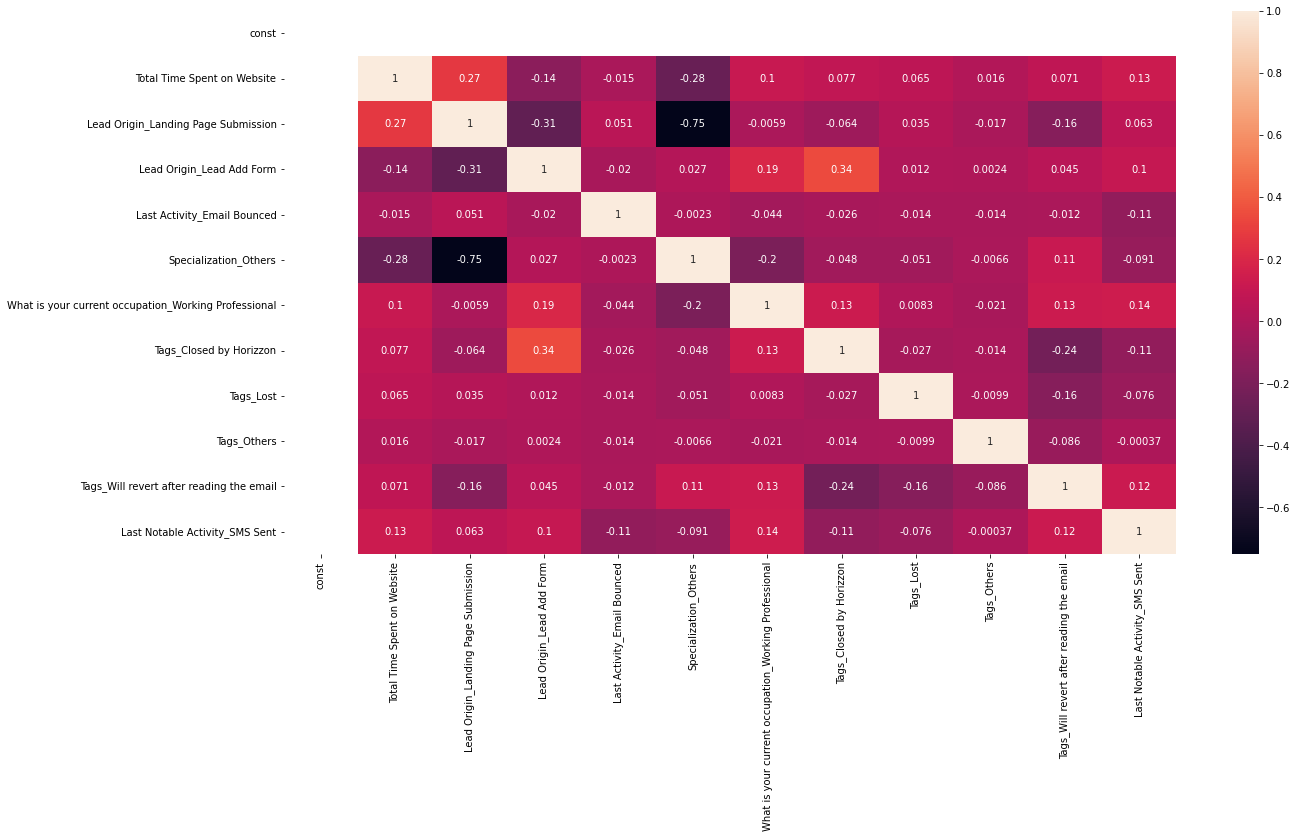

In [96]:
# To plot correlations
plt.figure(figsize = (20,10))  
sns.heatmap(X5.corr(),annot = True)
plt.show()

From VIF values and heat maps, we can see that there is not much multicollinearity present. All variables have Zero P-value and VIF < 5. These features seem important from the business aspect as well. So we need not drop any more variables and we can proceed with making predictions using this model only.

In [97]:
from sklearn import metrics

# Function to get confusion matrix and accuracy
def conf_mat(Converted,predicted):
    confusion = metrics.confusion_matrix(Converted, predicted )
    print("Confusion Matrix:")
    print(confusion)
    print("Training Accuracy: ", metrics.accuracy_score(Converted, predicted))
    return confusion

In [98]:
# Function to get predicted values on train set

def get_pred(X,logm):
    y_train_pred = logm.predict(X)
    y_train_pred = y_train_pred.values.reshape(-1)
    # To create a dataframe to store original and predicted values
    y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
    y_train_pred_final['Lead ID'] = y_train.index
    # Using default threshold of 0.5 for now
    y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
    return y_train_pred_final

In [99]:
# Function for calculating metric beyond accuracy
def other_metrics(confusion):
    TP = confusion[1,1]    # True positives 
    TN = confusion[0,0]    # True negatives
    FP = confusion[0,1]    # False positives
    FN = confusion[1,0]    # False negatives
    print("Sensitivity: ", TP / float(TP+FN))
    print("Specificity: ", TN / float(TN+FP))
    print("False postive rate - predicting the lead conversion when the lead does not convert: ", FP/ float(TN+FP))
    print("Positive predictive value: ", TP / float(TP+FP))
    print("Negative predictive value: ", TN / float(TN+FN))

In [100]:
# To get predicted values on train set
y_train_pred_final = get_pred(X4,logm4)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted
0,0,0.019276,1871,0
1,0,0.084951,6795,0
2,0,0.005124,3516,0
3,0,0.382065,8105,0
4,0,0.134533,3934,0


In [101]:
# Confusion Matrix and accuracy
confusion = conf_mat(y_train_pred_final.Converted,y_train_pred_final.predicted)

Confusion Matrix:
[[3708  294]
 [ 442 2024]]
Training Accuracy:  0.8862090290661719


| Predicted/Actual | Not converted Leads | Converted Leads |
| --- | --- | --- |
| Not converted Leads | 3708 | 294 |
| Converted Leads | 442 | 2024 |


This is our **final model**:
1. All p-values are very close to zero.
2. VIFs for all features are very low. There is hardly any multicollinearity present.
3. Training accuracy of **88.62%** is decent.

#### Metrics other than Accuracy

In [102]:
other_metrics(confusion)

Sensitivity:  0.8207623682076237
Specificity:  0.9265367316341829
False postive rate - predicting the lead conversion when the lead does not convert:  0.0734632683658171
Positive predictive value:  0.8731665228645384
Negative predictive value:  0.8934939759036145


In [103]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_train_pred_final['Converted'], y_train_pred_final['predicted'] ))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4002
           1       0.87      0.82      0.85      2466

    accuracy                           0.89      6468
   macro avg       0.88      0.87      0.88      6468
weighted avg       0.89      0.89      0.89      6468



### Step 7 : Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [104]:
# Function to plot ROC
def plot_roc(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [105]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)

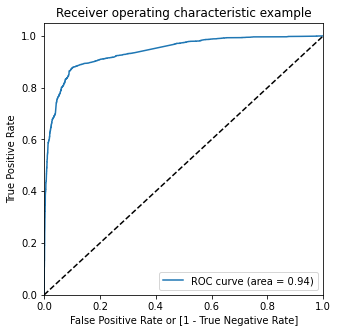

In [106]:
# To plot ROC
plot_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [107]:
print("Area under curve: ", metrics.roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Converted_prob))

Area under curve:  0.9398058979431615


### Step 8 : Finding Optimal Cutoff Point
Optimal cutoff probability is the prob where we get balanced sensitivity and specificity.

In [108]:
# To create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.019276,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.084951,6795,0,1,0,0,0,0,0,0,0,0,0
2,0,0.005124,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.382065,8105,0,1,1,1,1,0,0,0,0,0,0
4,0,0.134533,3934,0,1,1,0,0,0,0,0,0,0,0


In [109]:
# To calculate accuracy, sensitivity and specificity for various probability cutoffs
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1]    # True positive 
# TN = confusion[0,0]    # True negatives
# FP = confusion[0,1]    # False positives
# FN = confusion[1,0]    # False negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.690322  0.971614  0.516992
0.2   0.2  0.835962  0.911192  0.789605
0.3   0.3  0.883426  0.883617  0.883308
0.4   0.4  0.891156  0.865775  0.906797
0.5   0.5  0.886209  0.820762  0.926537
0.6   0.6  0.880489  0.776156  0.944778
0.7   0.7  0.860235  0.691809  0.964018
0.8   0.8  0.843383  0.621249  0.980260
0.9   0.9  0.808596  0.514193  0.990005


<Figure size 864x432 with 0 Axes>

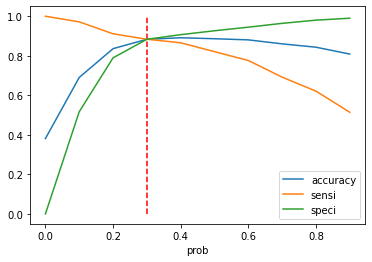

In [110]:
# Plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize = (12,6))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.3,ymax = 1.0,ymin=0.0,color='r',linestyle='--')
plt.show()

From the curve above, **0.3 is the optimum point to take as a cutoff probability**.

In [111]:
# Using 0.3 threshold for predictions
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.019276,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.084951,6795,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.005124,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.382065,8105,0,1,1,1,1,0,0,0,0,0,0,1
4,0,0.134533,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [112]:
# Confusion matrix and Overall Accuracy
confusion2 = conf_mat(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

Confusion Matrix:
[[3535  467]
 [ 287 2179]]
Training Accuracy:  0.883426097711812


In [113]:
# Other metrics
other_metrics(confusion2)

Sensitivity:  0.883617193836172
Specificity:  0.8833083458270865
False postive rate - predicting the lead conversion when the lead does not convert:  0.11669165417291354
Positive predictive value:  0.8235071806500378
Negative predictive value:  0.924908424908425


In [114]:
from sklearn.metrics import classification_report

print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      4002
           1       0.82      0.88      0.85      2466

    accuracy                           0.88      6468
   macro avg       0.87      0.88      0.88      6468
weighted avg       0.89      0.88      0.88      6468



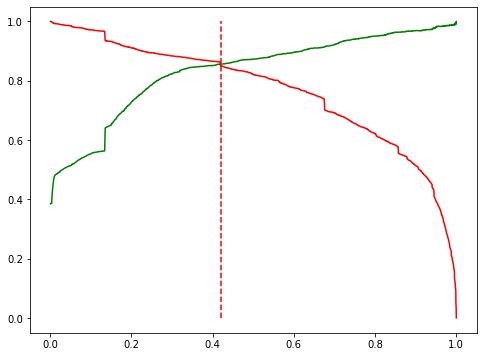

In [115]:
#### precision or recall tradeoff
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.figure(figsize = (8,6))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.vlines(x=0.42,ymax = 1.0,ymin=0.0,color='r',linestyle='--')
plt.show()

From the curve above, **0.42 is the optimum point to take as a cutoff probability using Precision-Recall**. We can check our accuracy using this cutoff too.

In [116]:
# Using 0.42 threshold for predictions
y_train_pred_final['final_predicted_pr'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_pr
0,0,0.019276,1871,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0.084951,6795,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0.005124,3516,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0.382065,8105,0,1,1,1,1,0,0,0,0,0,0,1,0
4,0,0.134533,3934,0,1,1,0,0,0,0,0,0,0,0,0,0


In [117]:
# Confusion matrix and overall accuracy
confusion3 = conf_mat(y_train_pred_final.Converted,y_train_pred_final.final_predicted_pr)

Confusion Matrix:
[[3647  355]
 [ 368 2098]]
Training Accuracy:  0.8882189239332097


In [118]:
# Other metrics
other_metrics(confusion3)

Sensitivity:  0.8507704785077048
Specificity:  0.9112943528235882
False postive rate - predicting the lead conversion when the lead does not convert:  0.0887056471764118
Positive predictive value:  0.855279249898084
Negative predictive value:  0.9083437110834371


Accuracy and other metrics yield better values for the earlier cutoffs. We'll use the cutoff of 0.3 as derived earlier for predictions on the test set.

### Step 9 : Making Predictions on the Test Set

In [119]:
# Feature transform on Test set
X_test[num_var] = scaler.fit_transform(X_test[num_var])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
4269,1.738658,0.933036,2.074447,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2376,-1.155538,-0.900812,-1.269139,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7766,0.653334,-0.793792,1.517182,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
9199,-1.155538,-0.900812,-1.269139,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4359,-1.155538,-0.900812,-1.269139,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [120]:
# To get final features
X_test_sm = X_test[col4]

In [121]:
# To add a constant
X_test_sm = sm.add_constant(X_test_sm)

In [122]:
# Making predictions
y_test_pred = logm5.predict(X_test_sm)

y_test_pred[:10]

4269    0.929089
2376    0.965629
7766    0.881434
9199    0.004144
4359    0.901363
9186    0.875404
1631    0.526342
8963    0.203021
8007    0.245947
5324    0.754249
dtype: float64

In [123]:
# To convert y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1.head()

,0
4269,0.929089
2376,0.965629
7766,0.881434
9199,0.004144
4359,0.901363


In [124]:
# To convert y_test to dataframe
y_test_ld = pd.DataFrame(y_test)

In [125]:
# Putting Lead ID to index
y_test_ld['Lead ID'] = y_test_ld.index

In [126]:
# To remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_ld.reset_index(drop=True, inplace=True)

In [127]:
# To append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_ld, y_pred_1],axis=1)

y_pred_final.head()

,Converted,Lead ID,0
0,1,4269,0.929089
1,1,2376,0.965629
2,1,7766,0.881434
3,0,9199,0.004144
4,1,4359,0.901363


In [128]:
# To Rename the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

y_pred_final.head()

,Converted,Lead ID,Converted_prob
0,1,4269,0.929089
1,1,2376,0.965629
2,1,7766,0.881434
3,0,9199,0.004144
4,1,4359,0.901363


In [129]:
# To put the threshold of 0.3 as derived
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

y_pred_final.head()

,Converted,Lead ID,Converted_prob,final_predicted
0,1,4269,0.929089,1
1,1,2376,0.965629,1
2,1,7766,0.881434,1
3,0,9199,0.004144,0
4,1,4359,0.901363,1


In [130]:
print("Area under curve: ", metrics.roc_auc_score(y_pred_final.Converted, y_pred_final.Converted_prob))

Area under curve:  0.9378401853712461


In [131]:
# Confusion matrix and overall accuracy
confusion_test = conf_mat(y_pred_final.Converted,y_pred_final.final_predicted)

Confusion Matrix:
[[1470  207]
 [ 125  970]]
Training Accuracy:  0.8802308802308803


| Predicted/Actual | Not converted Leads | Converted Leads |
| --- | --- | --- |
| Not converted Leads | 1470 | 207 |
| Converted Leads | 125 | 970 |

In [132]:
# Other metrics
other_metrics(confusion_test)

Sensitivity:  0.8858447488584474
Specificity:  0.8765652951699463
False postive rate - predicting the lead conversion when the lead does not convert:  0.12343470483005367
Positive predictive value:  0.8241291418861513
Negative predictive value:  0.9216300940438872


In [133]:
# Classification Report

print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1677
           1       0.82      0.89      0.85      1095

    accuracy                           0.88      2772
   macro avg       0.87      0.88      0.88      2772
weighted avg       0.88      0.88      0.88      2772



### Step 10 : Assigning Lead Score
Lead Score = 100 * ConversionProbability <br>
This needs to be calculated for all the leads from the original dataset (train + test).

In [134]:
# To select test set
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

,Converted,Lead ID,Converted_prob,final_predicted
0,1,4269,0.929089,1
1,1,2376,0.965629,1
2,1,7766,0.881434,1
3,0,9199,0.004144,0
4,1,4359,0.901363,1


In [135]:
# To select train set
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_pr
0,0,0.019276,1871,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0.084951,6795,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0.005124,3516,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0.382065,8105,0,1,1,1,1,0,0,0,0,0,0,1,0
4,0,0.134533,3934,0,1,1,0,0,0,0,0,0,0,0,0,0


In [136]:
# To drop unnecessary columns from train set
leads_train_pred = leads_train_pred[['Lead ID','Converted','Converted_prob','final_predicted']]
leads_train_pred.head()

,Lead ID,Converted,Converted_prob,final_predicted
0,1871,0,0.019276,0
1,6795,0,0.084951,0
2,3516,0,0.005124,0
3,8105,0,0.382065,1
4,3934,0,0.134533,0


In [137]:
# To concatenate 2 datasets
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,Lead ID,Converted,Converted_prob,final_predicted
0,1871,0,0.019276,0
1,6795,0,0.084951,0
2,3516,0,0.005124,0
3,8105,0,0.382065,1
4,3934,0,0.134533,0


In [138]:
# To inspect the shape of the final dataset
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(6468, 4)
(2772, 4)
(9240, 4)


In [139]:
# To ensure uniqueness of Lead IDs
len(lead_full_pred['Lead ID'].unique().tolist())

9240

In [140]:
# To calculate the Lead Score
lead_full_pred['Lead_Score'] = lead_full_pred['Converted_prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,Lead ID,Converted,Converted_prob,final_predicted,Lead_Score
0,1871,0,0.019276,0,2
1,6795,0,0.084951,0,8
2,3516,0,0.005124,0,1
3,8105,0,0.382065,1,38
4,3934,0,0.134533,0,13


In [141]:
# To make the Lead ID column as index
lead_full_pred = lead_full_pred.set_index('Lead ID').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

,Converted,Converted_prob,final_predicted,Lead_Score
Lead ID,,,,
0,0,0.004144,0,0
1,0,0.014494,0,1
2,1,0.748146,1,75
3,0,0.008041,0,1
4,1,0.345582,1,35


In [142]:
# To get Lead Number column from original data
ld_o = ld['Lead Number']
ld_o.head()

0    660737
1    660728
2    660727
3    660719
4    660681
Name: Lead Number, dtype: int64

In [143]:
# To concatenate the 2 dataframes based on index
leads_with_score = pd.concat([ld_o, lead_full_pred], axis=1)
leads_with_score.head()

,Lead Number,Converted,Converted_prob,final_predicted,Lead_Score
0,660737,0,0.004144,0,0
1,660728,0,0.014494,0,1
2,660727,1,0.748146,1,75
3,660719,0,0.008041,0,1
4,660681,1,0.345582,1,35


We have a new data frame consisting of Lead Number and Lead Score. Lead Number will help in easy referencing with the original data.

### Step 11: Final Observation
Let us compare the values obtained for Train & Test:

**Train Data:**
 - Accuracy : 88.34%
 - Sensitivity/Recall : 88.36%
 - Specificity : 88.33%
 - Precision : 82.35%

**Test Data:**
 - Accuracy : 88.02%
 - Sensitivity/Recall : 88.58%
 - Specificity : 87.65%
 - Precision : 82.41%

<a> The Model seems to predict the Conversion Rate decently. We should be able to help the education company select the most promising Leads or the Hot Leads.

In [144]:
leads_with_score.shape

(9240, 5)

In [145]:
Hot_leads = leads_with_score.loc[leads_with_score['Lead_Score'] > 80,:].sort_values(by = 'Lead_Score', ascending = False)
Hot_leads.head()

,Lead Number,Converted,Converted_prob,final_predicted,Lead_Score
7501,592087,1,0.999853,1,100
2533,635362,1,0.999133,1,100
7927,589006,1,0.999899,1,100
2490,635809,1,0.999899,1,100
2495,635776,1,0.999805,1,100


In [146]:
Hot_leads.shape

(2262, 5)

 - When the Company has `limited time and resources`, it should approach `Hot_leads` i.e. those leads who have more than 80% of conversion chances to achieve maximum conversion & to avoid useless phone calls.
 - When the company has `ample amount of resources and time` in its hand, then it should approach all the `Potential Leads`. But since it has sufficient time in its hand, it should also focus on customers who have lesser conversion rate to improve the overall conversion rate of the leads.